In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
#import requests library and api key
import requests

from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ae2902e3e010d9ab7118921cb459ff24


In [8]:
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ae2902e3e010d9ab7118921cb459ff24&q=Boston


In [9]:
weather_response = requests.get(city_url)
weather_response.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 40.32,
  'feels_like': 34.95,
  'temp_min': 37.35,
  'temp_max': 43.38,
  'pressure': 1017,
  'humidity': 49},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 160},
 'clouds': {'all': 0},
 'dt': 1644428247,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1644407328,
  'sunset': 1644444494},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [11]:
boston_data = city_weather.json()

In [12]:
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1644407328,
 'sunset': 1644444494}

In [13]:
boston_data["dt"]

1644428247

In [14]:
boston_data["coord"]['lat']

42.3584

In [15]:
boston_data["main"]["temp_max"]

43.38

In [16]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 43.38 49 0 8.05


In [17]:
import time
from datetime import datetime

date = boston_data["dt"]

#utc will print year / month / day / hour / minute / second
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 2, 9, 17, 37, 27)

In [18]:
#reformat datetime
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-02-09 17:37:27'

In [19]:
#we are going to find the data for 500 cities in 10 sets of 50 cities at a time
#since we are using a free subscription with limited calls per minute we will rest for 60 secs between each set of 50
# first create an empty list to hold our city data
city_data = []
#print the beginning of data detrievel
print("Beginning Data Retrievel")
print("----------------------")

#create counters
record_count = 1
set_count = 1

Beginning Data Retrievel
----------------------


In [20]:
#create a for loop to loop through cities
for i, city in enumerate(cities):
    
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    city_url = url + "&q=" + cities[i]
    
    print(f"Processing record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing record 1 of Set 1 | atsiki
City not found. Skipping...
Processing record 2 of Set 1 | lasa
Processing record 3 of Set 1 | upernavik
Processing record 4 of Set 1 | cape town
Processing record 5 of Set 1 | bluff
Processing record 6 of Set 1 | tambura
Processing record 7 of Set 1 | thompson
Processing record 8 of Set 1 | kapaa
Processing record 9 of Set 1 | amderma
City not found. Skipping...
Processing record 10 of Set 1 | saint george
Processing record 11 of Set 1 | rikitea
Processing record 12 of Set 1 | fortuna
Processing record 13 of Set 1 | chokurdakh
Processing record 14 of Set 1 | saskylakh
Processing record 15 of Set 1 | qaanaaq
Processing record 16 of Set 1 | grand river south east
City not found. Skipping...
Processing record 17 of Set 1 | tasiilaq
Processing record 18 of Set 1 | klaksvik
Processing record 19 of Set 1 | naze
Processing record 20 of Set 1 | severo-kurilsk
Processing record 21 of Set 1 | luganville
Processing record 22 of Set 1 | saint-philippe
Process

Processing record 36 of Set 4 | lorengau
Processing record 37 of Set 4 | hun
Processing record 38 of Set 4 | mount isa
Processing record 39 of Set 4 | katiola
Processing record 40 of Set 4 | sakakah
Processing record 41 of Set 4 | finschhafen
Processing record 42 of Set 4 | meyungs
City not found. Skipping...
Processing record 43 of Set 4 | solnechnyy
Processing record 44 of Set 4 | kars
Processing record 45 of Set 4 | clyde river
Processing record 46 of Set 4 | luwuk
Processing record 47 of Set 4 | ugoofaaru
Processing record 48 of Set 4 | gravdal
Processing record 49 of Set 4 | palabuhanratu
City not found. Skipping...
Processing record 50 of Set 4 | sarhari
Processing record 1 of Set 5 | christchurch
Processing record 2 of Set 5 | caravelas
Processing record 3 of Set 5 | erdenet
Processing record 4 of Set 5 | awjilah
Processing record 5 of Set 5 | pemba
Processing record 6 of Set 5 | verkhnyaya inta
Processing record 7 of Set 5 | port moresby
Processing record 8 of Set 5 | mafinga
P

Processing record 27 of Set 8 | havelock
Processing record 28 of Set 8 | moranbah
Processing record 29 of Set 8 | kazalinsk
City not found. Skipping...
Processing record 30 of Set 8 | mahebourg
Processing record 31 of Set 8 | katobu
Processing record 32 of Set 8 | portland
Processing record 33 of Set 8 | carbonear
Processing record 34 of Set 8 | padang
Processing record 35 of Set 8 | neuquen
Processing record 36 of Set 8 | atar
Processing record 37 of Set 8 | harper
Processing record 38 of Set 8 | constitucion
Processing record 39 of Set 8 | boyolangu
Processing record 40 of Set 8 | ixtapa
Processing record 41 of Set 8 | khipro
Processing record 42 of Set 8 | zharkent
Processing record 43 of Set 8 | gold coast
Processing record 44 of Set 8 | aripuana
Processing record 45 of Set 8 | jequie
Processing record 46 of Set 8 | hasaki
Processing record 47 of Set 8 | bengkulu
Processing record 48 of Set 8 | azimur
City not found. Skipping...
Processing record 49 of Set 8 | prince rupert
Process

Processing record 17 of Set 12 | mlonggo
Processing record 18 of Set 12 | katsuura
Processing record 19 of Set 12 | paamiut
Processing record 20 of Set 12 | pilar
Processing record 21 of Set 12 | karakendzha
City not found. Skipping...
Processing record 22 of Set 12 | moree
Processing record 23 of Set 12 | kerema
Processing record 24 of Set 12 | jaguey grande
Processing record 25 of Set 12 | belmonte
Processing record 26 of Set 12 | mouzouras
Processing record 27 of Set 12 | pagudpud
Processing record 28 of Set 12 | kanniyakumari
Processing record 29 of Set 12 | san patricio
Processing record 30 of Set 12 | eunice
Processing record 31 of Set 12 | les cayes
Processing record 32 of Set 12 | kampil
Processing record 33 of Set 12 | kamina
Processing record 34 of Set 12 | tyulyachi
Processing record 35 of Set 12 | dalbandin
Processing record 36 of Set 12 | shchelyayur
City not found. Skipping...
Processing record 37 of Set 12 | linhares
Processing record 38 of Set 12 | brae
Processing recor

In [21]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lasa,46.6166,10.7002,54.86,33,5,2.80,IT,2022-02-09 17:38:24
1,Upernavik,72.7868,-56.1549,-12.21,68,96,8.72,GL,2022-02-09 17:38:24
2,Cape Town,-33.9258,18.4232,73.89,71,0,12.66,ZA,2022-02-09 17:37:24
3,Bluff,-46.6000,168.3333,59.81,97,100,3.80,NZ,2022-02-09 17:38:25
4,Tambura,5.6000,27.4667,82.06,22,19,4.54,SS,2022-02-09 17:38:25


In [22]:
#create a csv file to hold the new dataframe
output_data_file = "weather_data/cities.csv"

#export data to file we created above
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [25]:
today = time.time()
today

1644430373.2211142

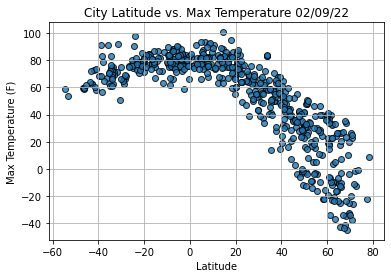

In [26]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

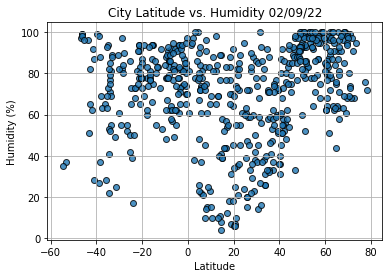

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

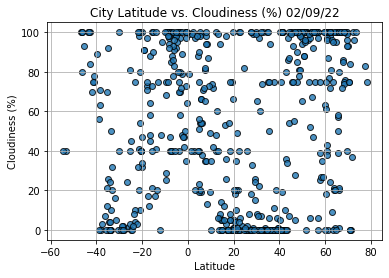

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

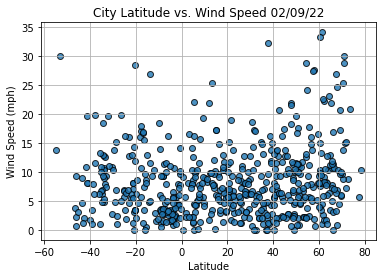

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [32]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

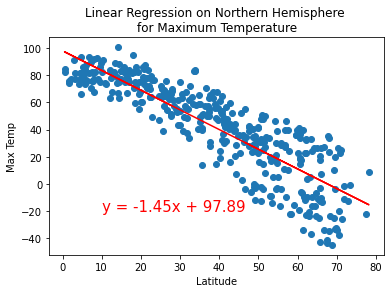

In [63]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,
                      'Linear Regression on Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,-20))

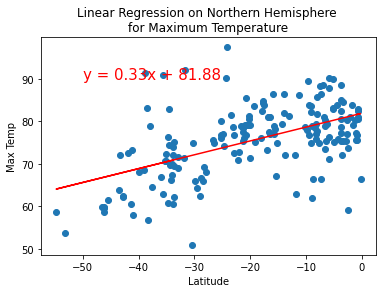

In [64]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,
                      'Linear Regression on Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

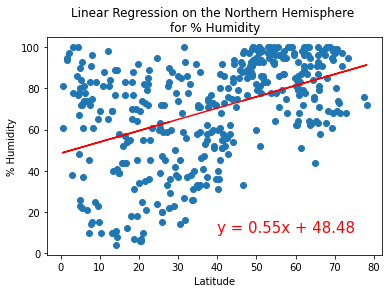

In [65]:
# Linear regression on the Northern Hemisphere humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

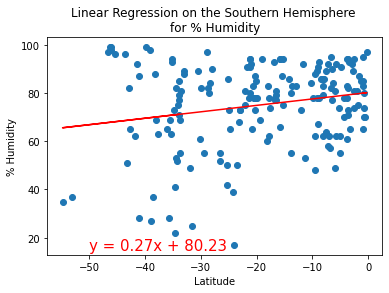

In [66]:
# Linear regression on the Southern Hemisphere humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

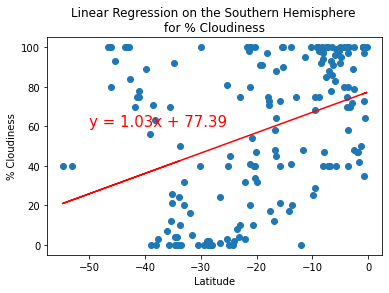

In [68]:
# Linear regression on the Southern Hemisphere cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

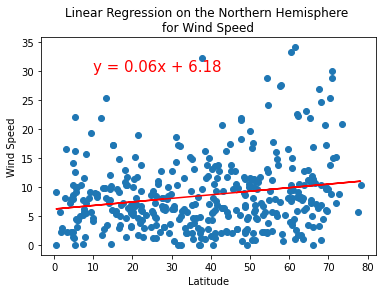

In [71]:
# Linear regression on the Northern Hemisphere wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(10,30))